In [1]:
# Import libraries 

import face_recognition
import os
import numpy as np
from IPython.display import Image

In [2]:
# Load Images and face embeddings 

def load_images(known_images_dir):
    known_encodings = []
    known_images = []

    for file in os.listdir(known_images_dir):
        filename = os.fsdecode(file)
        image = face_recognition.load_image_file(os.path.join(known_images_dir, filename))
        
        enc = face_recognition.face_encodings(image)
        if len(enc) > 0:
            known_encodings.append(enc[0])
            known_images.append(filename)
        
    return (known_encodings, known_images)

In [3]:
# Calculate Euclidean Distance

def calculate_face_distance(known_encodings, unknown_img_path, cutoff=0.5, num_results=4):
    # Load a test image and get encondings for it
    image_to_test = face_recognition.load_image_file(unknown_img_path)
    image_to_test_encoding = face_recognition.face_encodings(image_to_test)[0]

    # See how far apart the test image is from the known faces
    face_distances = face_recognition.face_distance(known_encodings, image_to_test_encoding)
    return (unknown_img_path, known_images[face_distances.argmin()])

In [4]:
known_encodings, known_images = load_images("images")

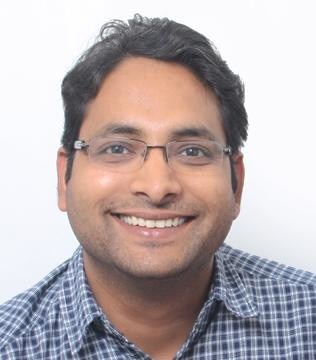

In [5]:
original_image = "sandeep.jpg"
Image(filename=original_image) 

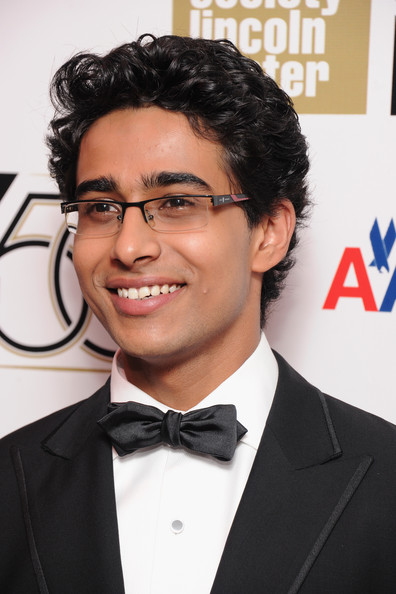

In [6]:
matching_image = calculate_face_distance(known_encodings, original_image)[1]
Image(filename='images/{}'.format(matching_image)) 